### 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline


In [2]:
from sklearn.datasets import load_boston

# Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Boston Housing dataset. Here's a description of each feature:

- `CRIM`: Per capita crime rate by town.
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: Proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if the tract bounds the river, 0 otherwise).
- `NOX`: Nitric oxides concentration (parts per 10 million).
- `RM`: Average number of rooms per dwelling.
- `AGE`: Proportion of owner-occupied units built prior to 1940.
- `DIS`: Weighted distances to five Boston employment centers.
- `RAD`: Index of accessibility to radial highways.
- `TAX`: Full-value property tax rate per $10,000.
- `PTRATIO`: Pupil-teacher ratio by town.
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.
- `LSTAT`: Percentage lower status of the population.
- `MEDV`: Median value of owner-occupied homes in $1000s.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Creating the independent and dependent features
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [10]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


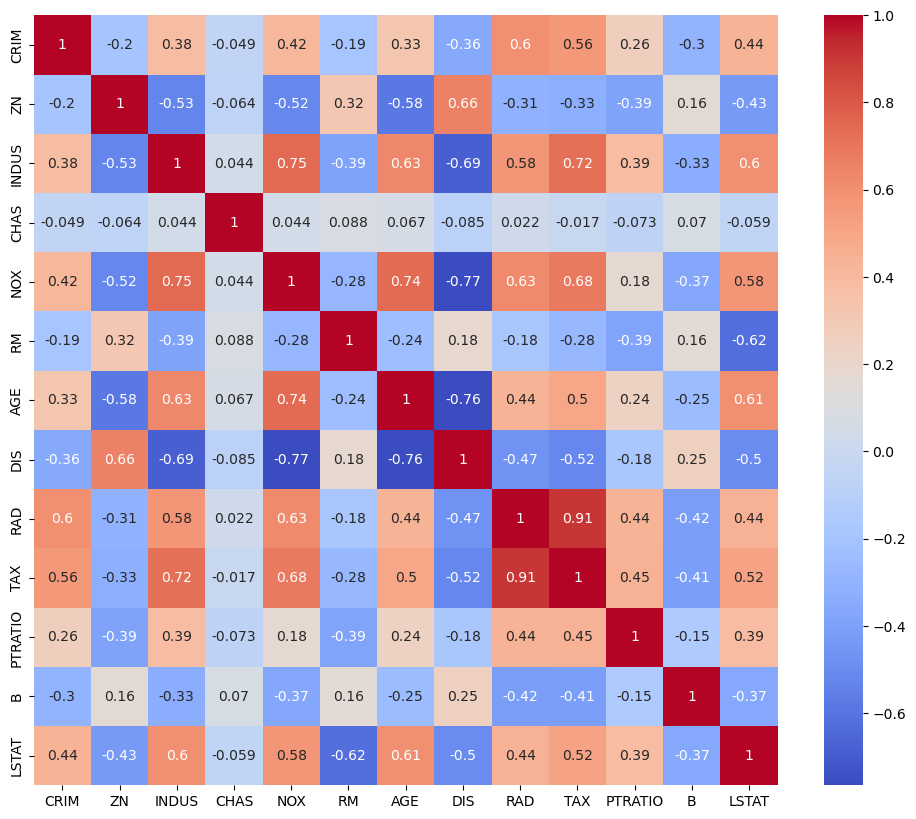

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pearson Correlation
plt.figure(figsize=(12, 10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()


In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [13]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [14]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

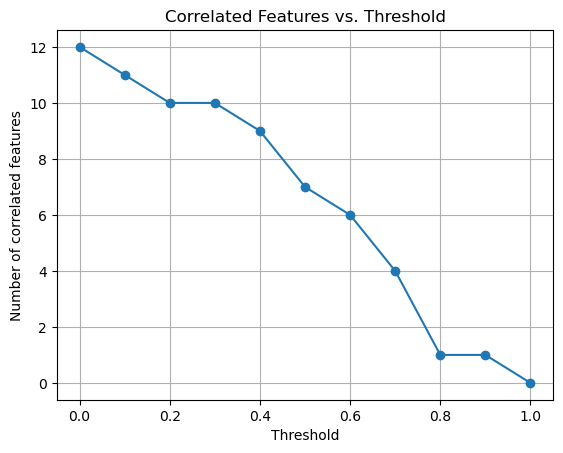

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train is a pandas DataFrame containing the dataset

# Define the threshold range with desired precision
threshold_range = np.arange(0, 1.1, 0.1)

# List to store the number of correlated features for each threshold
num_feat_list = []
rounded_threshold_list = []

# Iterate over the threshold range
for threshold in threshold_range:
    corr_features = correlation(X_train, threshold)
    num_feat = len(corr_features)
    num_feat_list.append(num_feat)
    # Round the threshold value to 1 decimal place
    rounded_threshold = round(threshold, 1)
    rounded_threshold_list.append(rounded_threshold)

# Plot the data
plt.plot(rounded_threshold_list, num_feat_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Number of correlated features')
plt.title('Correlated Features vs. Threshold')
plt.grid(True)
plt.show()  

Increasing the threshold in feature correlation analysis leads to a decreased number of correlated features and an increased number of uncorrelated features. This can help in feature selection by focusing on highly correlated features and reducing redundancy. However, setting the threshold too high may result in a loss of important correlations and valuable information. Finding the right balance is crucial.

In [16]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54


### **Santander Coustomer Satisfaction**

In [17]:
df = pd.read_csv('_dataset\santander.csv', nrows=10000)

X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

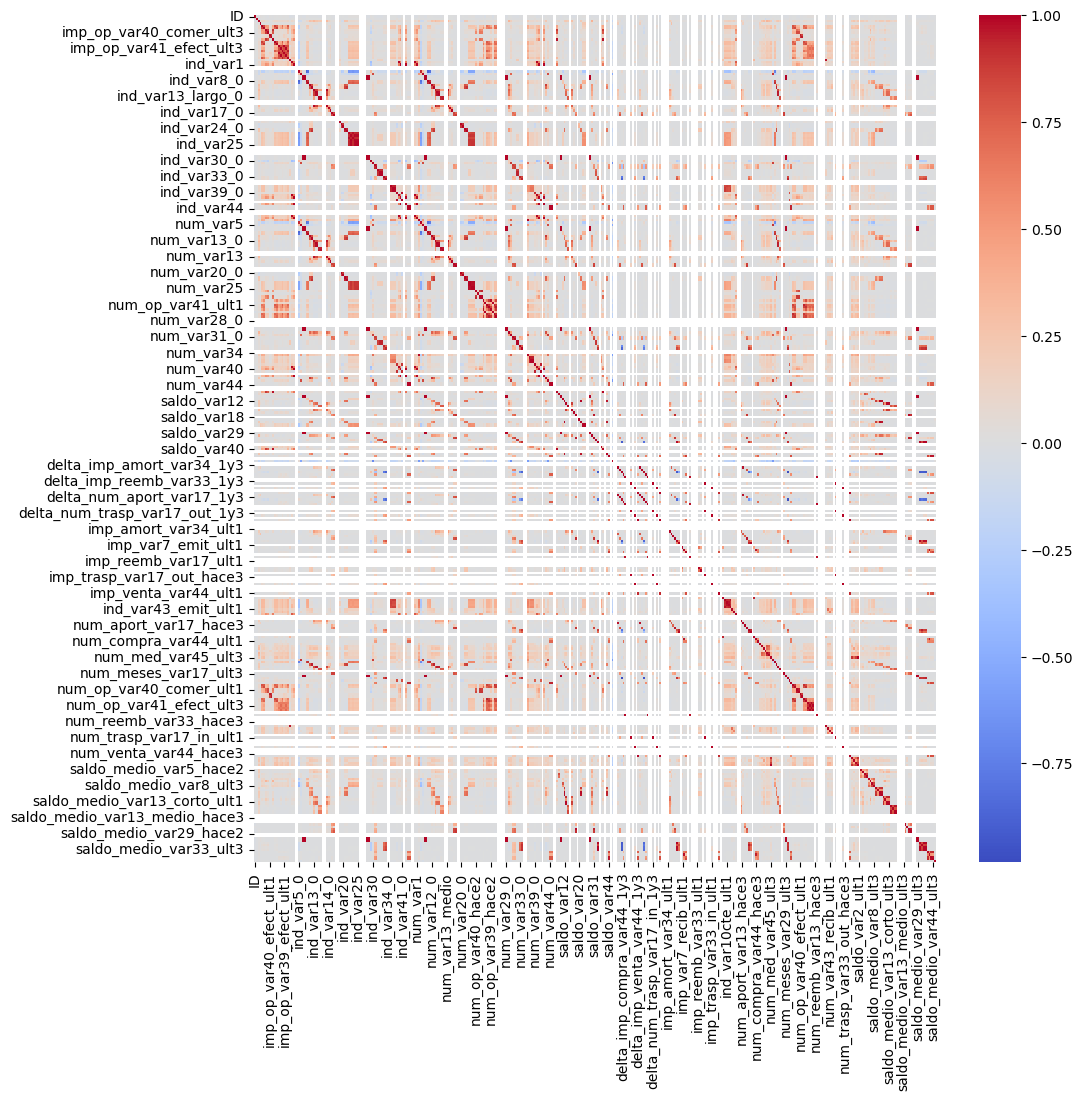

In [18]:
import seaborn as sns

#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap="coolwarm")
plt.show()

In [19]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [20]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [21]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15
